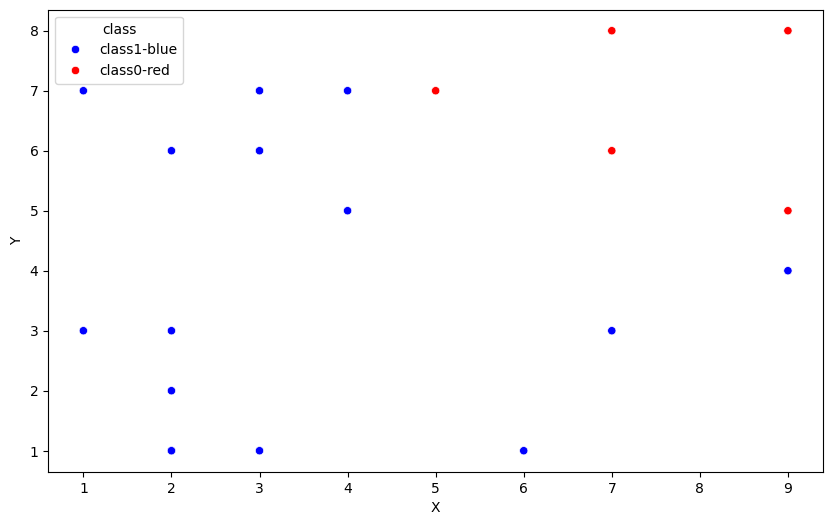

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Generate 20 random data points for X and Y
data = {'X': np.random.randint(1, 10, 20), 'Y': np.random.randint(1, 10, 20)}

df = pd.DataFrame(data)

# Create a condition for class0-blue and class1-red
df['class'] = np.where((df['X'] >= 5) & (df['Y'] >= 5), 'class0-red', 'class1-blue')

# Plot the data
plt.figure(figsize=(10, 6))
sns.scatterplot(x='X', y='Y', hue='class', data=df, palette=['blue', 'red'])
plt.show()


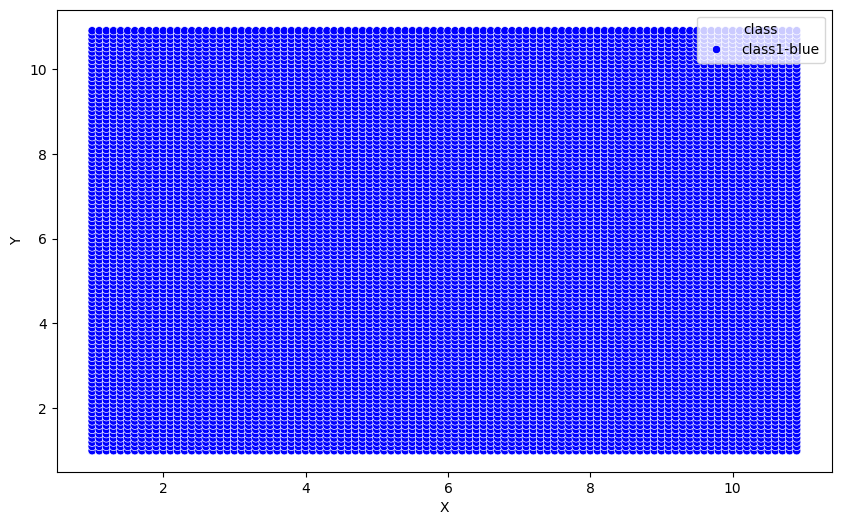

In [7]:
from sklearn.neighbors import KNeighborsClassifier

# Generate test set data
X_test = np.mgrid[1:11:0.1, 1:11:0.1].reshape(2,-1).T

# Prepare training data
X_train = df[['X', 'Y']].values
y_train = np.where(df['class'] == 'class0-blue', 0, 1)

# Create and train kNN classifier
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, y_train)

# Predict classes for test set
y_test = knn.predict(X_test)

# Create a dataframe for test set
df_test = pd.DataFrame(X_test, columns=['X', 'Y'])
df_test['class'] = np.where(y_test ==0 , 'class0-red', 'class1-blue')

# Plot the test data
plt.figure(figsize=(10, 6))
unique_classes = df_test['class'].unique()
palette = ['blue'] if len(unique_classes) == 1 else ['blue', 'red']
sns.scatterplot(x='X', y='Y', hue='class', data=df_test, palette=palette)
plt.show()